# Capstone Project - The Battle of Neighborhoods (Week 2)

### Install & import necessary libaries:

In [1]:
!pip install geocoder
!pip install folium


import pandas as pd
import numpy as np
import geocoder
import folium
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


print("Libaries installed")

Libaries installed


### Scrape & clean data 

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
extracting_data = requests.get(url).text
Canada_data = BeautifulSoup(extracting_data, 'lxml')

In [3]:
# creat a new Dataframe
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)

# loop through to find postcode, borough, neighborhood 
content = Canada_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text.strip('\n').replace(']','')
            i = i + 1
        elif i == 1:
            borough = td.text.strip('\n').replace(']','')
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

# clean dataframe 
toronto = toronto[toronto.Borough!='Not assigned']
toronto = toronto[toronto.Borough!= 0]
toronto.reset_index(drop = True, inplace = True)
i = 0
for i in range(0,toronto.shape[0]):
    if toronto.iloc[i][2] == 'Not assigned':
        toronto.iloc[i][2] = toronto.iloc[i][1]
        i = i+1
                                 
df = toronto.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [4]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [5]:
print(df2.shape)
df2

(103, 3)


,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [6]:
df2.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,10,98
top,M3N,North York,Downsview
freq,1,24,4


### Add dataframe latitude nad longitude data

In [7]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M4G')

[43.70941386000004, -79.36309957799995]

In [8]:
# Retrieving Postal Code Co-ordinates
postal_codes = df2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [9]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df2['Latitude'] = df_coords['Latitude']
df2['Longitude'] = df_coords['Longitude']

In [10]:
address = 'North York,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Seattle,Washington are 43.7543263, -79.44911696639593.


In [11]:
df2

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.808626,-79.189913
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.785779,-79.157368
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.765806,-79.185284
3,M1G,Scarborough,Woburn,43.771545,-79.218135
4,M1H,Scarborough,Cedarbrae,43.768791,-79.238813
5,M1J,Scarborough,Scarborough Village,43.744203,-79.228725
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.726881,-79.265694
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.713340,-79.284942
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.723538,-79.228353
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.696448,-79.265642


### Create map of City Tornoto 

In [12]:
map_NorthYork = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NorthYork)  
    
map_NorthYork

In [13]:
address = 'North York,Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 43.7543263, -79.44911696639593.


In [14]:
CLIENT_ID = 'NQZWERI0KBQWJPHT1SUPVSTRGMHLKWWVQ00UU3YWUKPDHM3N' # my Foursquare ID
CLIENT_SECRET = 'QD4E4LC3IT55JXT3OHFK2VWILTLWN2GTNCOXXAH3RL54I5B0' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: NQZWERI0KBQWJPHT1SUPVSTRGMHLKWWVQ00UU3YWUKPDHM3N
CLIENT_SECRET: QD4E4LC3IT55JXT3OHFK2VWILTLWN2GTNCOXXAH3RL54I5B0


In [15]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [16]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups'],
      dtype='object')

In [17]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Locate nerby Venues

In [18]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Grill Gate,"[{'id': '4bf58dd8d48988d1c0941735', 'name': 'M...",43.753123,-79.451690
1,Wolfie's Deli,"[{'id': '4bf58dd8d48988d146941735', 'name': 'D...",43.754875,-79.442438
2,Orly Restaurant & Grill,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",43.754493,-79.443507
3,Bagel Plus,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.755395,-79.440686
4,Tim Hortons,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",43.754767,-79.443250


### Get categories of nerby venues 

In [19]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Grill Gate,Mediterranean Restaurant,43.753123,-79.451690
1,Wolfie's Deli,Deli / Bodega,43.754875,-79.442438
2,Orly Restaurant & Grill,Middle Eastern Restaurant,43.754493,-79.443507
3,Bagel Plus,Restaurant,43.755395,-79.440686
4,Tim Hortons,Coffee Shop,43.754767,-79.443250


Top 10 Categories

In [20]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Pizza Place                  2
Video Store                  1
Fried Chicken Joint          1
Coffee Shop                  1
Middle Eastern Restaurant    1
Mediterranean Restaurant     1
Sushi Restaurant             1
American Restaurant          1
Restaurant                   1
Deli / Bodega                1
Name: categories, dtype: int64

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# Nearby Venues
NorthYork_venues = getNearbyVenues(names=df2['Neighborhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )

Malvern / Rouge
Rouge Hill / Port Union / Highland Creek
Guildwood / Morningside / West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park / Ionview / East Birchmount Park
Golden Mile / Clairlea / Oakridge
Cliffside / Cliffcrest / Scarborough Village West
Birch Cliff / Cliffside West
Dorset Park / Wexford Heights / Scarborough Town Centre
Wexford / Maryvale
Agincourt
Clarks Corners / Tam O'Shanter / Sullivan
Milliken / Agincourt North / Steeles East / L'Amoreaux East
Steeles West / L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview / Henry Farm / Oriole
Bayview Village
York Mills / Silver Hills
Willowdale / Newtonbrook
Willowdale
York Mills West
Willowdale
Parkwoods
Don Mills
Don Mills
Bathurst Manor / Wilson Heights / Downsview North
Northwood Park / York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill / Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West / Riverdale
India Bazaar / The Beaches 

In [23]:
print('There are {} Uniques Categories.'.format(len(NorthYork_venues['Venue Category'].unique())))
NorthYork_venues.groupby('Neighborhood').count().head()

There are 313 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,35,35,35,35,35,35
Alderwood / Long Branch,10,10,10,10,10,10
Bathurst Manor / Wilson Heights / Downsview North,24,24,24,24,24,24
Bayview Village,5,5,5,5,5,5
Bedford Park / Lawrence Manor East,30,30,30,30,30,30


### Encoding of features 

In [24]:
# one hot encoding
NorthYork_onehot = pd.get_dummies(NorthYork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NorthYork_onehot['Neighborhood'] = NorthYork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [NorthYork_onehot.columns[-1]] + list(NorthYork_onehot.columns[:-1])
NorthYork_onehot = NorthYork_onehot[fixed_columns]
NorthYork_grouped = NorthYork_onehot.groupby('Neighborhood').mean().reset_index()
NorthYork_onehot.head(5)

,Yoga Studio,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Quad,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street A

In [25]:
num_top_venues = 5
for hood in NorthYork_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =NorthYork_grouped[NorthYork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                venue  freq
0       Shopping Mall  0.09
1  Chinese Restaurant  0.06
2  Dim Sum Restaurant  0.03
3    Sushi Restaurant  0.03
4          Restaurant  0.03


---- Alderwood / Long Branch ----
            venue  freq
0        Pharmacy   0.1
1            Pool   0.1
2  Sandwich Place   0.1
3             Pub   0.1
4    Dance Studio   0.1


---- Bathurst Manor / Wilson Heights / Downsview North ----
                venue  freq
0                Bank  0.08
1         Coffee Shop  0.08
2  Chinese Restaurant  0.04
3         Supermarket  0.04
4         Men's Store  0.04


---- Bayview Village ----
                        venue  freq
0                        Park   0.6
1  Construction & Landscaping   0.2
2                       Trail   0.2
3             Organic Grocery   0.0
4                 Opera House   0.0


---- Bedford Park / Lawrence Manor East ----
                venue  freq
0  Italian Restaurant  0.10
1         Coffee Shop  0.07
2         Pizza Place  0.07

                 venue  freq
0            Racetrack  0.08
1             Pharmacy  0.08
2  Sporting Goods Shop  0.08
3        Shopping Mall  0.08
4         Liquor Store  0.08


---- Lawrence Manor / Lawrence Heights ----
                 venue  freq
0       Clothing Store  0.17
1           Restaurant  0.05
2         Dessert Shop  0.05
3     Greek Restaurant  0.03
4  Fried Chicken Joint  0.03


---- Lawrence Park ----
                  venue  freq
0                  Park  0.11
1            Restaurant  0.11
2  Gym / Fitness Center  0.11
3           Coffee Shop  0.11
4                 Trail  0.11


---- Leaside ----
                    venue  freq
0             Coffee Shop  0.08
1  Furniture / Home Store  0.06
2       Electronics Store  0.06
3     Sporting Goods Shop  0.06
4              Sports Bar  0.04


---- Little Portugal / Trinity ----
                venue  freq
0                 Bar  0.08
1          Restaurant  0.06
2  Italian Restaurant  0.04
3        Cocktail Bar  0.04
4         

                       venue  freq
0                Coffee Shop  0.17
1      Portuguese Restaurant  0.17
2  Middle Eastern Restaurant  0.17
3               Hockey Arena  0.17
4                Pizza Place  0.17


---- West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale ----
                venue  freq
0         Pizza Place  0.18
1             Theater  0.09
2   Convenience Store  0.09
3                Park  0.09
4  Mexican Restaurant  0.09


---- Westmount ----
                       venue  freq
0                Pizza Place  0.17
1             Ice Cream Shop  0.08
2             Discount Store  0.08
3  Middle Eastern Restaurant  0.08
4                Flea Market  0.08


---- Weston ----
                 venue  freq
0                Diner  0.14
1  Fried Chicken Joint  0.14
2       Breakfast Spot  0.14
3                 Bank  0.14
4          Pizza Place  0.14


---- Wexford / Maryvale ----
                       venue  freq
0               Burger Joint  0.14
1  Middle

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Searching for most common venues/facilities near neighborhoods of Toronto

In [27]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = NorthYork_grouped['Neighborhood']

for ind in np.arange(NorthYork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NorthYork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Shopping Mall,Chinese Restaurant,Lounge,Mediterranean Restaurant,Latin American Restaurant,Breakfast Spot,Bubble Tea Shop,Skating Rink,Malay Restaurant,Filipino Restaurant
1,Alderwood / Long Branch,Pool,Pharmacy,Gas Station,Dance Studio,Coffee Shop,Skating Rink,Gym,Pizza Place,Pub,Sandwich Place
2,Bathurst Manor / Wilson Heights / Downsview North,Coffee Shop,Bank,Chinese Restaurant,Shopping Mall,Middle Eastern Restaurant,Bridal Shop,Community Center,Sandwich Place,Fried Chicken Joint,Supermarket
3,Bayview Village,Park,Construction & Landscaping,Trail,Women's Store,Falafel Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
4,Bedford Park / Lawrence Manor East,Italian Restaurant,Pizza Place,Sandwich Place,Restaurant,Thai Restaurant,Coffee Shop,Pharmacy,Pub,Butcher,Café
5,Berczy Park,Coffee Shop,Restaurant,Japanese Restaurant,Café,Hotel,Beer Bar,Italian Restaurant,Breakfast Spot,Seafood Restaurant,Bakery
6,Birch Cliff / Cliffside West,General Entertainment,Gym,Construction & Landscaping,Convenience Store,College Stadium,Café,Skating Rink,Park,Doner Restaurant,Donut Shop
7,Brockton / Parkdale Village / Exhibition Place,Café,Restaurant,Coffee Shop,Bar,Lounge,Tibetan Restaurant,Gift Shop,Sandwich Place,Supermarket,Indian Restaurant
8,Business reply mail Processing CentrE,Coffee Shop,Café,Hotel,Restaurant,Bar,Beer Bar,Arts & Crafts Store,Pub,Bakery,Tea Room
9,CN Tower / King and Spadina / Railway Lands / ...,Coffee Shop,Gym,Café,Restaurant,Sandwich Place,Park,Italian Restaurant,Japanese Restaurant,Brewery,Seafood Restaurant


### Clustering 

In [28]:
# Using K-Means to cluster neighborhood into 3 clusters
NorthYork_grouped_clustering = NorthYork_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(NorthYork_grouped_clustering)
kmeans.labels_

array([0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1])

In [29]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NorthYork_merged=df2[df2.Borough == 'North York']

NorthYork_merged = NorthYork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

NorthYork_merged.head()# check the last columns!

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M2H,North York,Hillcrest Village,43.802556,-79.356566,1,Park,Chinese Restaurant,Fast Food Restaurant,Bakery,Pharmacy,Residential Building (Apartment / Condo),Farmers Market,Farm,Falafel Restaurant,Field
18,M2J,North York,Fairview / Henry Farm / Oriole,43.780306,-79.348687,0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Bakery,Food Court,Tea Room,Bank,Japanese Restaurant,Toy / Game Store
19,M2K,North York,Bayview Village,43.780607,-79.376921,2,Park,Construction & Landscaping,Trail,Women's Store,Falafel Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
20,M2L,North York,York Mills / Silver Hills,43.749360,-79.380690,0,Bank,Coffee Shop,Baseball Field,Shopping Mall,Sandwich Place,Supermarket,Bus Stop,Butcher,Ice Cream Shop,Pharmacy
21,M2M,North York,Willowdale / Newtonbrook,43.791800,-79.406428,1,Park,Home Service,Playground,Vietnamese Restaurant,Cosmetics Shop,Bridal Shop,Café,Women's Store,Donut Shop,Dumpling Restaurant


#### Most common venues near neighborhoods of North York, Toronto

In [30]:
NorthYork_merged

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M2H,North York,Hillcrest Village,43.802556,-79.356566,1,Park,Chinese Restaurant,Fast Food Restaurant,Bakery,Pharmacy,Residential Building (Apartment / Condo),Farmers Market,Farm,Falafel Restaurant,Field
18,M2J,North York,Fairview / Henry Farm / Oriole,43.780306,-79.348687,0,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Bakery,Food Court,Tea Room,Bank,Japanese Restaurant,Toy / Game Store
19,M2K,North York,Bayview Village,43.780607,-79.376921,2,Park,Construction & Landscaping,Trail,Women's Store,Falafel Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
20,M2L,North York,York Mills / Silver Hills,43.749360,-79.380690,0,Bank,Coffee Shop,Baseball Field,Shopping Mall,Sandwich Place,Supermarket,Bus Stop,Butcher,Ice Cream Shop,Pharmacy
21,M2M,North York,Willowdale / Newtonbrook,43.791800,-79.406428,1,Park,Home Service,Playground,Vietnamese Restaurant,Cosmetics Shop,Bridal Shop,Café,Women's Store,Donut Shop,Dumpling Restaurant
22,M2N,North York,Willowdale,43.769077,-79.413695,0,Coffee Shop,Korean Restaurant,Pizza Place,Ramen Restaurant,Japanese Restaurant,Bank,Sandwich Place,Sushi Restaurant,Bakery,Fast Food Restaurant
23,M2P,North York,York Mills West,43.750260,-79.398355,1,Park,Bank,Dentist's Office,Convenience Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
24,M2R,North York,Willowdale,43.779912,-79.445229,0,Coffee Shop,Korean Restaurant,Pizza Place,Ramen Restaurant,Japanese Restaurant,Bank,Sandwich Place,Sushi Restaurant,Bakery,Fast Food Restaurant
25,M3A,North York,Parkwoods,43.752935,-79.335641,1,Golf Course,Road,Park,Train Station,Food & Drink Shop,Filipino Restaurant,Field,Dive Bar,Dog Run,Doner Restaurant
26,M3B,North York,Don Mills,43.748900,-79.357220,0,Bank,Coffee Shop,Electronics Store,Diner,Clothing Store,Italian Restaurant,Dim Sum Restaurant,Restaurant,Gas Station,Pharmacy


In [75]:
NorthYork_neighborhoods_most_common_venues=NorthYork_merged.drop(['Borough', 'Latitude', 'Longitude','Cluster Labels'], axis=1)

In [76]:
NorthYork_neighborhoods_most_common_venues

,Postalcode,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,M2H,Hillcrest Village,Park,Chinese Restaurant,Fast Food Restaurant,Bakery,Pharmacy,Residential Building (Apartment / Condo),Farmers Market,Farm,Falafel Restaurant,Field
18,M2J,Fairview / Henry Farm / Oriole,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Bakery,Food Court,Tea Room,Bank,Japanese Restaurant,Toy / Game Store
19,M2K,Bayview Village,Park,Construction & Landscaping,Trail,Women's Store,Falafel Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
20,M2L,York Mills / Silver Hills,Bank,Coffee Shop,Baseball Field,Shopping Mall,Sandwich Place,Supermarket,Bus Stop,Butcher,Ice Cream Shop,Pharmacy
21,M2M,Willowdale / Newtonbrook,Park,Home Service,Playground,Vietnamese Restaurant,Cosmetics Shop,Bridal Shop,Café,Women's Store,Donut Shop,Dumpling Restaurant
22,M2N,Willowdale,Coffee Shop,Korean Restaurant,Pizza Place,Ramen Restaurant,Japanese Restaurant,Bank,Sandwich Place,Sushi Restaurant,Bakery,Fast Food Restaurant
23,M2P,York Mills West,Park,Bank,Dentist's Office,Convenience Store,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
24,M2R,Willowdale,Coffee Shop,Korean Restaurant,Pizza Place,Ramen Restaurant,Japanese Restaurant,Bank,Sandwich Place,Sushi Restaurant,Bakery,Fast Food Restaurant
25,M3A,Parkwoods,Golf Course,Road,Park,Train Station,Food & Drink Shop,Filipino Restaurant,Field,Dive Bar,Dog Run,Doner Restaurant
26,M3B,Don Mills,Bank,Coffee Shop,Electronics Store,Diner,Clothing Store,Italian Restaurant,Dim Sum Restaurant,Restaurant,Gas Station,Pharmacy


In [31]:
kclusters = 10

In [32]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(NorthYork_merged['Latitude'], 
                                   NorthYork_merged['Longitude'], 
                                   NorthYork_merged['Neighborhood'], 
                                   NorthYork_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [33]:
df_1=NorthYork_merged.loc[NorthYork_merged['Cluster Labels'] == 0,NorthYork_merged.columns[[2] + list(range(5, NorthYork_merged.shape[1]))]]
df_2=NorthYork_merged.loc[NorthYork_merged['Cluster Labels'] == 1,NorthYork_merged.columns[[2] + list(range(5, NorthYork_merged.shape[1]))]]
df_3=NorthYork_merged.loc[NorthYork_merged['Cluster Labels'] == 2,NorthYork_merged.columns[[2] + list(range(5, NorthYork_merged.shape[1]))]]

### AVERAGE HOUSING PRICES 

In [39]:
NorthYork_Avg_HousingPrice=pd.DataFrame({"Borough":df2["Borough"],"Neighborhood":df2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.0,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

In [59]:
NorthYork_Avg_HousingPrice

,Average_Housing_Price
Neighborhood,
Hillcrest Village,435000.0
Fairview / Henry Farm / Oriole,289500.0
Bayview Village,265000.0
York Mills / Silver Hills,285900.0
Willowdale / Newtonbrook,239400.0
Willowdale,589900.0
York Mills West,295000.0
Willowdale,380500.0
Parkwoods,378500.0


In [41]:
NorthYork_Avg_HousingPrice=NorthYork_Avg_HousingPrice[NorthYork_Avg_HousingPrice.Borough == 'North York']

In [42]:
NorthYork_Avg_HousingPrice

,Borough,Neighborhood,Average_Housing_Price
17,North York,Hillcrest Village,435000.0
18,North York,Fairview / Henry Farm / Oriole,289500.0
19,North York,Bayview Village,265000.0
20,North York,York Mills / Silver Hills,285900.0
21,North York,Willowdale / Newtonbrook,239400.0
22,North York,Willowdale,589900.0
23,North York,York Mills West,295000.0
24,North York,Willowdale,380500.0
25,North York,Parkwoods,378500.0
26,North York,Don Mills,438500.0


In [44]:
NorthYork_Avg_HousingPrice=NorthYork_Avg_HousingPrice.drop(['Borough'], axis=1)

In [45]:
NorthYork_Avg_HousingPrice

,Neighborhood,Average_Housing_Price
17,Hillcrest Village,435000.0
18,Fairview / Henry Farm / Oriole,289500.0
19,Bayview Village,265000.0
20,York Mills / Silver Hills,285900.0
21,Willowdale / Newtonbrook,239400.0
22,Willowdale,589900.0
23,York Mills West,295000.0
24,Willowdale,380500.0
25,Parkwoods,378500.0
26,Don Mills,438500.0


In [46]:
NorthYork_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

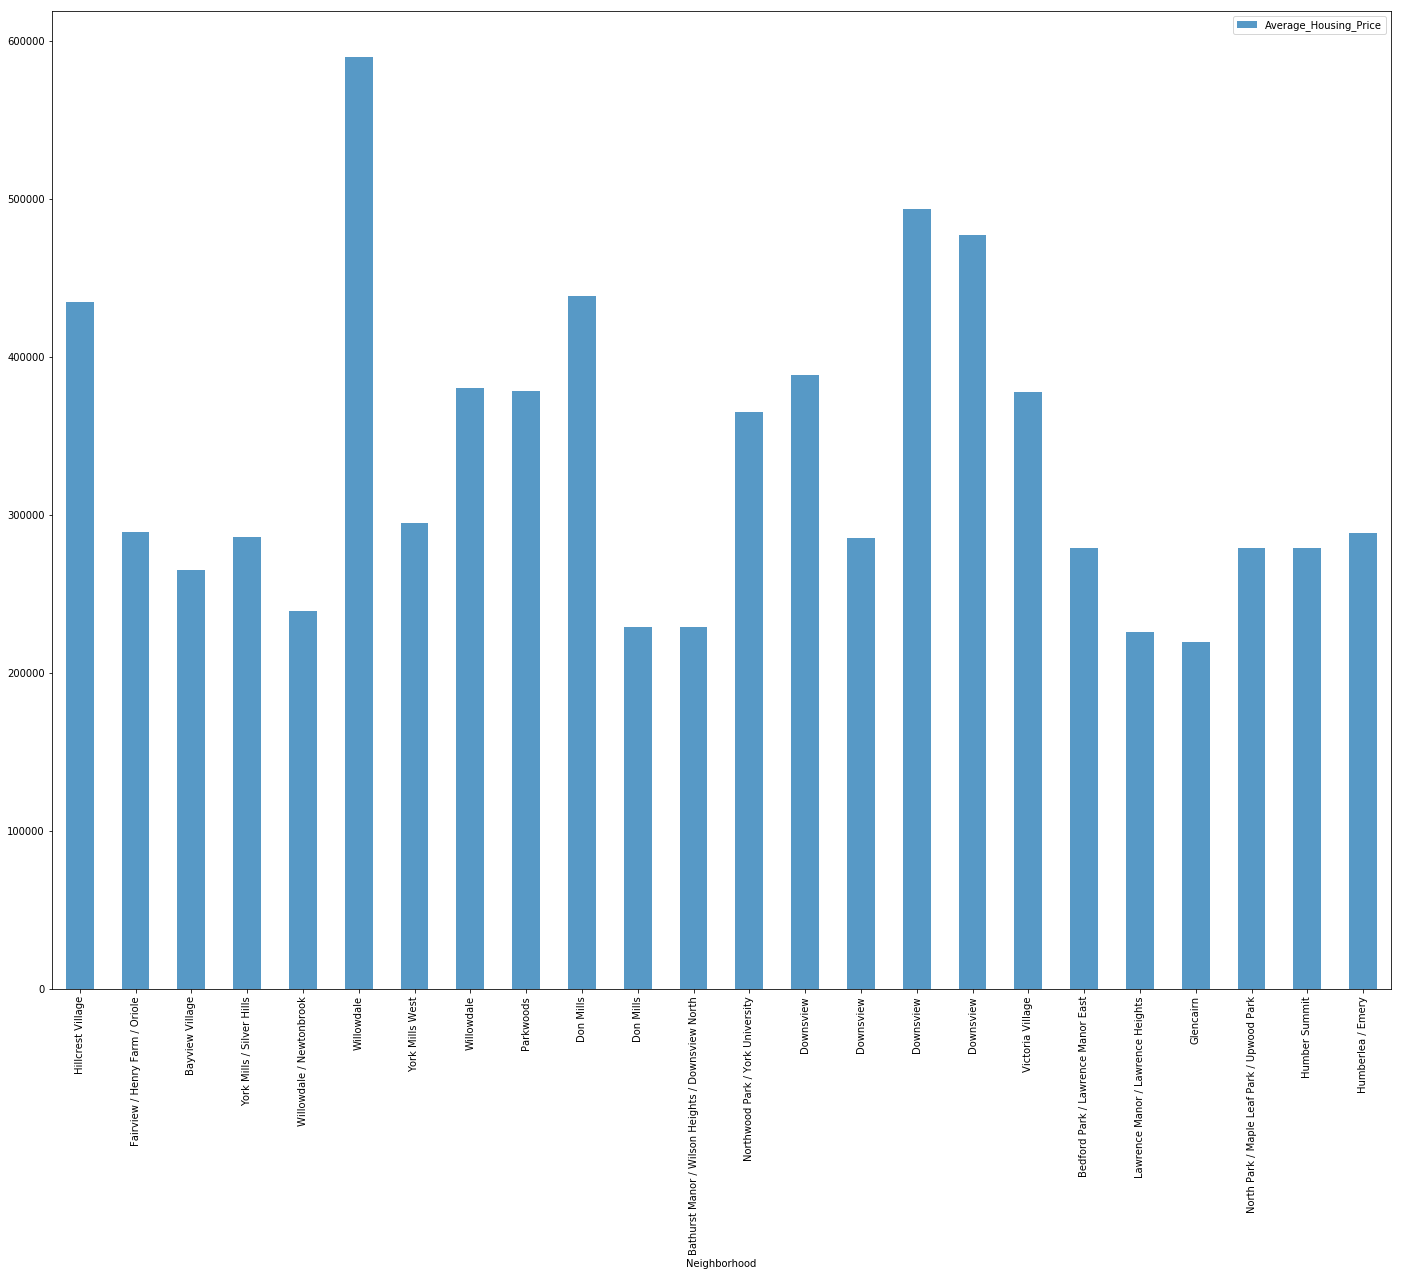

In [47]:

NorthYork_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

### Average School Rating by Clusters 

In [50]:
clusters=pd.DataFrame({"Cluster1":df_1["Neighborhood"],
                      "Cluster2":df_2["Neighborhood"],
                      "Cluster3":df_3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [61]:
new_NorthYork=NorthYork_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
NorthYork_school_ratings=pd.DataFrame({"Borough":df2["Borough"],"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [62]:
NorthYork_school_ratings

,Borough,Neighborhood,Top School Rating
0,Scarborough,Malvern / Rouge,7
1,Scarborough,Rouge Hill / Port Union / Highland Creek,9
2,Scarborough,Guildwood / Morningside / West Hill,5
3,Scarborough,Woburn,8
4,Scarborough,Cedarbrae,10
5,Scarborough,Scarborough Village,10
6,Scarborough,Kennedy Park / Ionview / East Birchmount Park,7
7,Scarborough,Golden Mile / Clairlea / Oakridge,10
8,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,1
9,Scarborough,Birch Cliff / Cliffside West,2


In [63]:
NorthYork_school_ratings=NorthYork_school_ratings[NorthYork_school_ratings.Borough == 'North York']

In [64]:
NorthYork_school_ratings

,Borough,Neighborhood,Top School Rating
17,North York,Hillcrest Village,5
18,North York,Fairview / Henry Farm / Oriole,4
19,North York,Bayview Village,8
20,North York,York Mills / Silver Hills,9
21,North York,Willowdale / Newtonbrook,9
22,North York,Willowdale,6
23,North York,York Mills West,6
24,North York,Willowdale,4
25,North York,Parkwoods,5
26,North York,Don Mills,4


In [65]:
NorthYork_school_ratings=NorthYork_school_ratings.drop(['Borough'], axis=1)

In [66]:
NorthYork_school_ratings

,Neighborhood,Top School Rating
17,Hillcrest Village,5
18,Fairview / Henry Farm / Oriole,4
19,Bayview Village,8
20,York Mills / Silver Hills,9
21,Willowdale / Newtonbrook,9
22,Willowdale,6
23,York Mills West,6
24,Willowdale,4
25,Parkwoods,5
26,Don Mills,4


In [71]:
NorthYork_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

KeyError: 'Neighborhood'

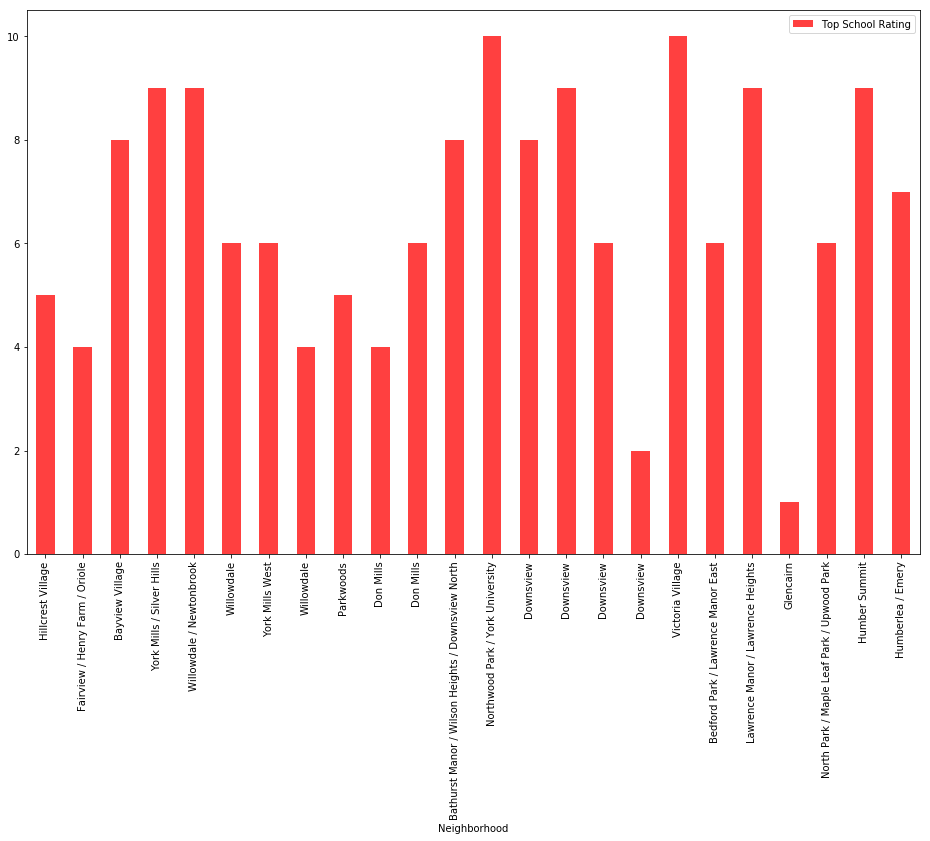

In [72]:
NorthYork_school_ratings.plot(kind='bar',figsize=(16,10),color='red',alpha=0.75);

### Conclusion 

On my opinon best best choice of neighborhood for apartment in North York is Humberlea/Emery. I think so because the the school rating is above the average (not the best not the worst), the average price is acceptable and there are on my opinion best combination of venues nerby. Which includes coffe shops, playground, park and different restaurants.